<a href="https://colab.research.google.com/github/LiviaBBLeap/motionblur/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

jupyter notebook  --NotebookApp.allow_origin='https://colab.research.google.com'   --port=8888  --NotebookApp.port_retries=0

run this in the comand prompt to connect to a local session

In [ ]:
#imports  
from keras import layers
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras import callbacks
from keras import backend as k
import pandas as pd
from keras import optimizers
import seaborn as sns

In [ ]:
#variables
#train_data_dir= "/content/drive/MyDrive/whole_lap_divide"
train_data_dir = r"C:\Users\livin\Desktop\bbleap\whole_lap_divide"
batch_size = 120
image_size = 1080,1920

In [ ]:
#read the data
datagen = ImageDataGenerator(validation_split = 0.2, horizontal_flip=True, vertical_flip = True, rotation_range=90)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size =image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size =image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data



Found 624 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


In [ ]:
input_shape=train_generator[0][0].shape
input_shape

(120, 1080, 1920, 3)

In [ ]:
#the input shape has to fit our images
input_shape = (1080,1920,3)

In [ ]:
# Defining the model architecture


model = Sequential()
model.add(layers.Convolution2D(96, 7,7,input_shape=input_shape))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Convolution2D(256, 5, 5))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))



In [ ]:
import tensorflow

In [ ]:
#model variables

epochs = 50
learning_rate = 0.01
decay = learning_rate / epochs
adam = tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])

In [ ]:
#cretes graphs for accuracy and loss
def assess(history):
    accur = history.history['accuracy']
    df1 = pd.DataFrame({'ACCURACY':accur,'type':'TRAIN'})
    df1['EPOCH'] = (df1.index)+1
    val_accur = history.history['val_accuracy']
    df2 = pd.DataFrame({'ACCURACY':val_accur,'type':'TEST'})
    df2['EPOCH'] = (df1.index)+1
    df = pd.concat([df1,df2]).reset_index(drop=True)
    sns.relplot(data=df, x = 'EPOCH', y = 'ACCURACY', kind = 'line', hue = 'type', palette = ['red', 'blue']).set(title='CLASSIFICATION ACCURACY')
 
    loss = history.history['loss']
    df3 = pd.DataFrame({'LOSS':loss,'type':'TRAIN'})
    df3['EPOCH'] = (df1.index)+1
    val_l = history.history['val_loss']
    df4 = pd.DataFrame({'LOSS':val_l,'type':'TEST'})
    df4['EPOCH'] = (df1.index)+1
    df = pd.concat([df3,df4]).reset_index(drop=True)
    sns.relplot(data=df, x = 'EPOCH', y = 'LOSS', kind = 'line', hue = 'type', palette = ['red', 'blue']).set(title='CROSS ENTROPHY LOSS')


Epoch 1/50
6/6 [==============================] - 513s 98s/step - loss: 433.1696 - accuracy: 0.5176 - val_loss: 18.0877 - val_accuracy: 0.5769
Epoch 2/50
6/6 [==============================] - 463s 81s/step - loss: 11.9062 - accuracy: 0.5192 - val_loss: 1.5374 - val_accuracy: 0.5769
Epoch 3/50
6/6 [==============================] - 382s 64s/step - loss: 1.2995 - accuracy: 0.5256 - val_loss: 0.6713 - val_accuracy: 0.5769
Epoch 4/50
6/6 [==============================] - 397s 67s/step - loss: 0.6779 - accuracy: 0.5881 - val_loss: 0.6514 - val_accuracy: 0.5769
Epoch 5/50
6/6 [==============================] - 400s 67s/step - loss: 1.0181 - accuracy: 0.5529 - val_loss: 1.6049 - val_accuracy: 0.4231
Epoch 6/50
6/6 [==============================] - 413s 69s/step - loss: 1.0398 - accuracy: 0.5577 - val_loss: 0.4793 - val_accuracy: 0.6987
Epoch 7/50
6/6 [==============================] - 460s 76s/step - loss: 1.0989 - accuracy: 0.5817 - val_loss: 0.7387 - val_accuracy: 0.5769
Epoch 8/50
6/6 [

NameError: ignored

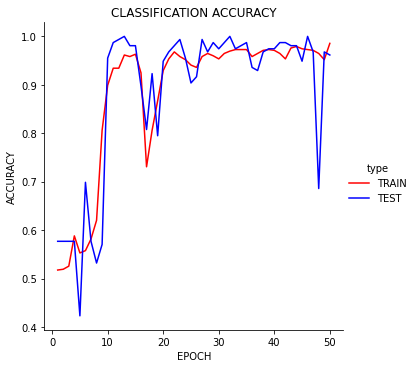

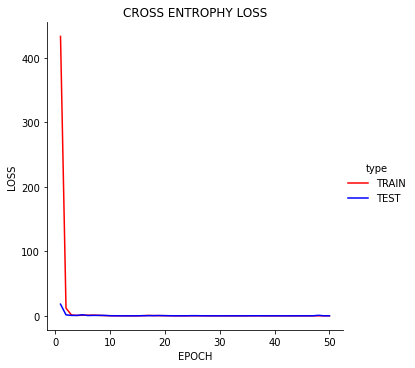

In [ ]:
# Training
hist = model.fit(train_generator,  batch_size=120, epochs=epochs, verbose=1, validation_data=validation_generator)
assess(hist)




In [ ]:
# Evaluating the model

score = model.evaluate(X_test, y_test, show_accuracy=True, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

# Save our model here
file = open(filepath+"motionblur.h5", 'a')
model.save(filepath+"motionblur.h5")
file.close()

In [ ]:
model.save(r"C:\Users\livin\Desktop\bbleap\cnn_50_epoch")

INFO:tensorflow:Assets written to: C:\Users\livin\Desktop\bbleap\cnn_50_epoch\assets


In [ ]:
import keras
reconstructed_model = keras.models.load_model(r"C:\Users\livin\Desktop\bbleap\cnn_saved_3")

In [ ]:
#prediction
from cv2 import imread
import numpy as np
i = imread(r"C:\Users\livin\Desktop\bbleap\whole_lap_divide\clean\4clean.png")
#i = np.swapaxes(i,0,1)
print(i.shape)
x = np.expand_dims(i, axis=0)
print(x.shape)
model.predict(x)

(1080, 1920, 3)
(1, 1080, 1920, 3)


array([[0.90780735]], dtype=float32)